In [3]:
import pandas as pd

In [4]:
appeal_data_path = "/home/mike/data/practice_data/nys_external_appeal_outcomes.xlsx"
df = pd.read_excel(appeal_data_path, engine="openpyxl")

/home/mike/persius/notebooks/.env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
df['Appeal Decision'].value_counts()

Upheld                12908
Overturned             9852
Overturned in Part      391
Name: Appeal Decision, dtype: int64

In [6]:
# Q: What are population counts here? What are initial appeal counts?
df["Health Plan"].value_counts()[:20]

Healthfirst Inc.                          4421
Fidelis Care New York                     3709
Empire Healthchoice Assurance Inc.        2327
Empire BlueCross BlueShield HealthPlus    1866
United Healthcare Plan of New York        1405
Metroplus Health Plan                     1342
Oxford                                    1108
Excellus                                   913
CVS Caremark                               714
Centers Plan for Healthy Living            567
HIP Health Plan of New York                435
Affinity Health Plan                       413
Aetna                                      376
VNSNY CHOICE Health Plans                  371
United Healthcare Ins. Co. of NY           308
Integra MLTC, Inc.                         259
MVP Health Plan                            238
CIGNA Healthcare of NY                     214
United Healthcare Ins. Co. of N.Y.         213
HomeFirst/Elderplan                        204
Name: Health Plan, dtype: int64

In [7]:
df["Agent"].value_counts()

IPRO                     8042
MCMC, LLC                6498
IMEDECS                  5277
Kepro dba IMEDECS        3331
MCMC Services, L.L.C.       3
Name: Agent, dtype: int64

In [8]:
df["Diagnosis"].value_counts()[:10]

[Cardiac/ Circulatory Problems]                     2891
[Digestive System/ Gastrointestinal]                2871
[Central Nervous System/ Neuromuscular Disorder]    2393
[Orthopedic/ Musculoskeletal]                       2056
[Dental Problems]                                   1779
[Respiratory System]                                1471
[Endocrine/ Metabolic/ Nutritional]                 1127
[Skin Disorders]                                    1056
[Substance Abuse/ Addiction]                         940
[Cancer]                                             921
Name: Diagnosis, dtype: int64

In [9]:
df["Age Range"].value_counts()

50-59      4671
60-69      3617
40-49      3114
10-19      2835
30-39      2773
20-29      2060
0-9        1664
80-89       956
70-79       800
over 90     660
-10--1        1
Name: Age Range, dtype: int64

In [10]:
df["Denial Reason"].value_counts()

Medical necessity               21394
Experimental/Investigational      867
Formulary Exception               853
Step Therapy                       34
Out-of-Network Service              3
Name: Denial Reason, dtype: int64

In [11]:
df["Gender"].value_counts()

Female                  12515
Male                    10602
Not Designated/Other       34
Name: Gender, dtype: int64

In [12]:
df["Summary 1"][131]

"Diagnosis: Primary hyperparathyroidism; multinodular goiter\nTreatment: Inpatient hospital admission\nSummary:  The inpatient hospital admission was not medically necessary.\nAcute inpatient hospitalization was not medically necessary for this patient for the dates of service under review.  The medical records support that this patient could have been reasonably and safely monitored with an observational status (rather than acute inpatient admission).\nThis patient presented with the diagnosis of hyperparathyroidism and a multinodular goiter.  She underwent total thyroidectomy, parathyroidectomy (right inferior, right superior, portion of left inferior), right central neck dissection, cervical thymectomy with intraoperative RLN and iPTH monitoring.  \nWhile there is risk for post-operative hypocalcemia following parathyroidectomy, this risk is minimized by the identification of each parathyroid gland that was performed in this case.  Also, the nadir for post-surgical calcium is not ty

In [13]:
# Idea: train a model to determine whether a scenario will be deemed medically necessary by an external review board.

In [14]:
df["Decision Year"].value_counts()

2022    6664
2021    6540
2020    5816
2019    4130
2002       1
Name: Decision Year, dtype: int64

In [15]:
puf_path = "/home/mike/data/practice_data/Transparency_in_Coverage_PUF.xlsx"
puf = pd.read_excel(puf_path, sheet_name=1)

In [16]:
# Get rid of junk rows
puf.columns = puf.iloc[1]
puf = puf.iloc[2:]

In [17]:
puf.columns

Index(['State', 'Issuer_Name', 'Issuer_ID',
       'Is_Issuer_New_to_Exchange? (Yes_or_No)', 'SADP_Only?', 'Plan_ID',
       'QHP/SADP', 'Plan_Type', 'Metal_Level', 'URL_Claims_Payment_Policies',
       'Issuer_Claims_Received', 'Issuer_Claims_Denials',
       'Issuer_Internal_Appeals_Filed',
       'Issuer_Number_Internal_Appeals_Overturned',
       'Issuer_Percent_Internal_Appeals_Overturned',
       'Issuer_External_Appeals_Filed',
       'Issuer_Number_External_Appeals_Overturned',
       'Issuer_Percent_External_Appeals_Overturned',
       'Plan_Number_Claims_Received', 'Plan_Number_Claims_Denied',
       'Plan_Number_Claims_Denied_Referral_Required',
       'Plan_Number_Claims_Denied_Out_of_Network',
       'Plan_Number_Claims_Denied_Services_Excluded',
       'Plan_Number_Claims_Denied_Not_Medically_Necessary_Excl_Behavioral_Health',
       'Plan_Number_Claims_Denied_Not_Medically_Necessary_Behavioral_Health_Only',
       'Plan_Number_Claims_Denied_Other', 'Rate_Review',
       

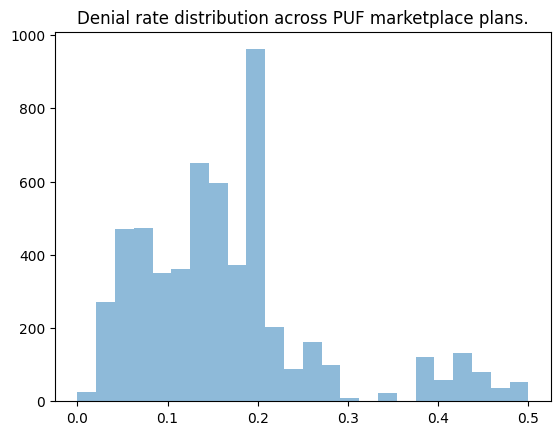

In [54]:
# Calculate issuer denial rate:
import numpy as np
import matplotlib.pyplot as plt
def denial_rate(row):
    recvd = row["Issuer_Claims_Received"]
    denied = row["Issuer_Claims_Denials"]
    if type(recvd) is str and type(denied) is str:
        return int(denied) / int(recvd)
    else:
        return -1

# Calculate denial rates where possible
puf["denial_rate"] = puf.apply(denial_rate, axis=1)
denial_rates = puf[puf["denial_rate"] != -1]


# Plot hist of denial rate:
fig, ax = plt.subplots()
ax.set_title("Denial rate distribution across PUF marketplace plans.")
ax.hist(denial_rates["denial_rate"], alpha=.5, bins=np.linspace(0, .5, 25))
plt.show()

In [22]:
puf["State"].value_counts()

TX    1090
FL     687
WI     537
NC     429
TN     416
IL     392
OH     341
GA     338
AZ     289
MI     231
MO     205
OK     195
NE     194
VA     145
KS     128
LA     127
UT      99
MT      97
SC      93
IN      88
IA      84
OR      77
MS      72
SD      64
ND      62
AL      59
NH      55
AR      51
DE      30
WV      26
WY      25
HI      22
AK      16
Name: State, dtype: int64

In [ ]:
# Plot denial rates by state

# Plot denial rates by insurer, by year (how it is progressing?)


# Plot denial type by insurer, by state? What dominates for each insurer, where to focus?

# KFF looks only at insurers from marketplace with "complete" data.

# How often do consumers get denied?

# How often do they appeal?

# How often do they win appeals (internal)?

# How often do they external appeal?

# How often do they win appeals (external)?

# How often do they win, period?

